## 💻 Python Fixation

### 1. Simple Random Sample from a DataFrame

Assume you have a `DataFrame` `df` with many rows.

Write a Python snippet that:

- Draws a simple random sample of **100 rows** from `df`,
- Leaves the original `df` unchanged.

Hint: use `df.sample(...)`.

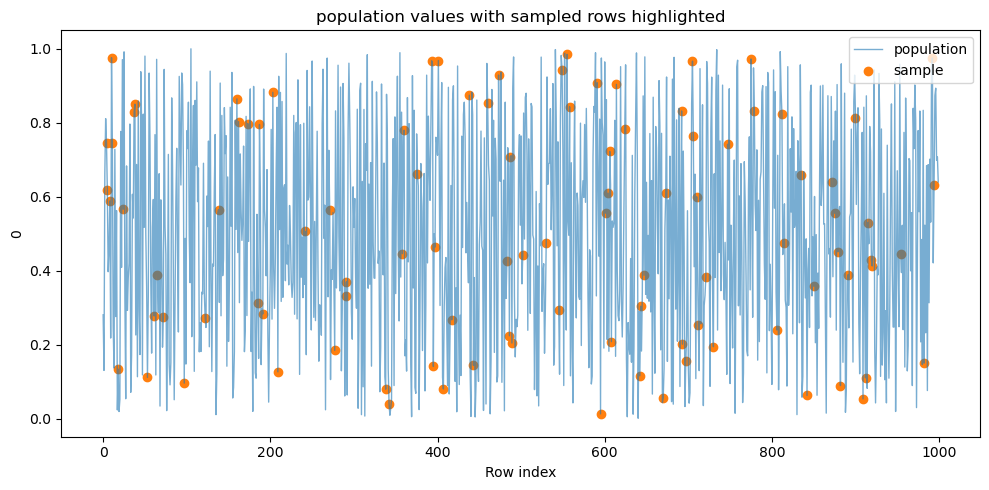

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
population = pd.DataFrame(np.random.random(1000))
col = population.columns[0]
plt.plot(population.index, population[col], color='C0', alpha=0.6, linewidth=1, label='population')
sample = population.sample(100, random_state=37)
plt.scatter(sample.index, sample[col], color='C1', label='sample')

plt.xlabel('Row index')
plt.ylabel(col)
plt.title('population values with sampled rows highlighted')
plt.legend()
plt.tight_layout()
plt.show()

### 2. Stratified Train/Test Split by Label

Suppose `df` contains features in all columns except `"label"`, which is the target.

1. Use `train_test_split` to create a **70/30 stratified split** based on `"label"`.
2. Print the class proportions in both train and test sets to verify stratification.

### 3. Manual K-Fold Index Split

Without using scikit-learn’s `KFold`, write Python code that:

- Takes `n = len(df)`
- Produces a shuffled array of indices
- Splits those indices into **5 folds** of (approximately) equal size

Hint: combine `np.random.permutation` and `np.array_split`.

### 4. Simple Bootstrap of a Mean in Python

Given:

```python
import numpy as np
x = np.array([5, 7, 9, 10, 12, 15, 18, 22, 25, 30])
```

Write a function `bootstrap_means(x, B=1000)` that:

- Draws `B` bootstrap samples (size `len(x)`, with replacement)
- Computes the mean of each bootstrap sample
- Returns the array of bootstrap means

Then compute the 2.5th and 97.5th percentiles of the bootstrap means to form a 95% interval.

### 5. Simulating Class Imbalance

1. Create a NumPy array `y` of length 1,000 that contains **950 zeros** and **50 ones**.
2. Use `np.unique(y, return_counts=True)` to verify the distribution.
3. (Optional) If you have `imblearn` installed, try oversampling the minority class using `RandomOverSampler` and print the new class counts.

### 6. Stratified K-Fold Skeleton

Write a small Python skeleton that sets up a `StratifiedKFold` with 5 splits and, for each split, prints the proportion of class 1 in the validation set.

```python
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = np.random.randn(1000, 5)
y = np.concatenate([np.zeros(950), np.ones(50)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for fold, (_, val_idx) in enumerate(skf.split(X, y), start=1):
    y_val = y[val_idx]
    prop_pos = (y_val == 1).mean()
    print(f"Fold {fold}: proportion of class 1 in validation = {prop_pos:.3f}")
```

Check that each fold has roughly the same proportion of positives.